Name : SILVA G.B.N.M. <br>
Index No : 190592X

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Q1

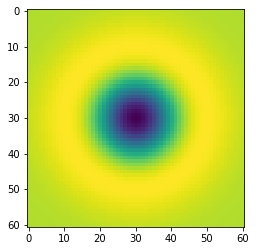

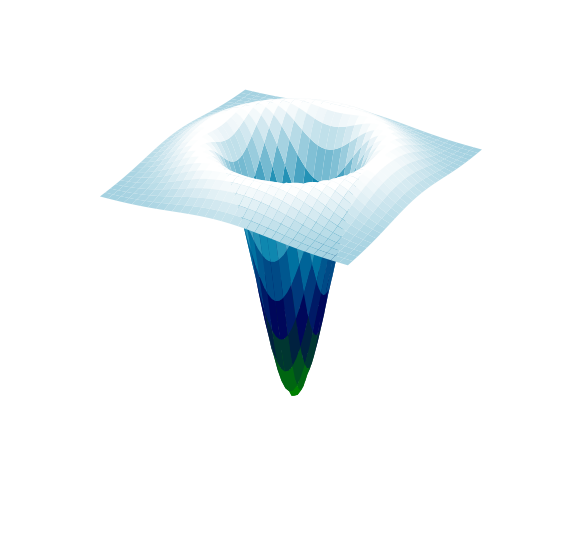

In [4]:
sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')

surf = ax.plot_surface(X,Y,log,cmap = cm.ocean, linewidth = 0 , antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.axis('off')
plt.show()

Q2

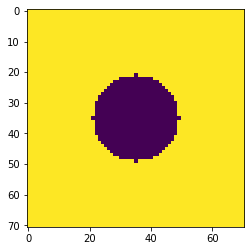

In [5]:
w,h = 71, 71
hw, hh = w//2 , h//2
f = np.ones((h,w),dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))
r = w//5
f +=  X**2+ Y**2>r**2
plt.imshow(f)

(35, 35, 4)
9


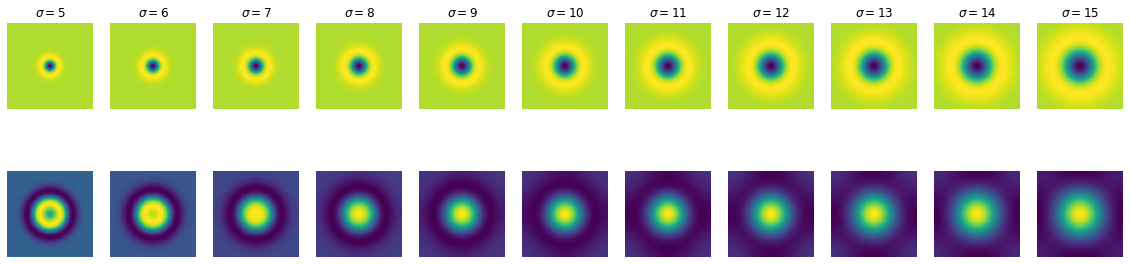

In [11]:
s = 11
fig,ax = plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas = np.arange(5,16,1)
for i ,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])

Scale spectrum extremum hits it maximum when $\sigma$ = 10 because 10 = $r\sqrt(2)$

Q 3

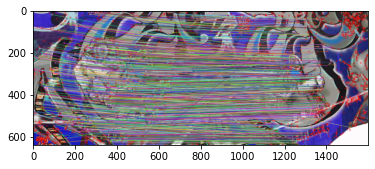

In [24]:
im1 = cv.imread(r'graf/img1.ppm')
im2 = cv.imread(r'graf/img2.ppm')

sift = cv.SIFT_create()

key1, desc1 =  sift.detectAndCompute(im1,None)
key2, desc2 =  sift.detectAndCompute(im2,None)

br_fo = cv.BFMatcher()
matches = br_fo.knnMatch(desc1,desc2,k=2)

selected = []
for m,n in matches:
    if m.distance<0.75*n.distance:
        selected.append([m])

im3 = cv.drawMatchesKnn(im1,key1,im2,key2,selected,None,singlePointColor=(255,0,0),flags = cv.DrawMatchesFlags_DEFAULT)

plt.imshow(im3)
plt.show()

Q 4

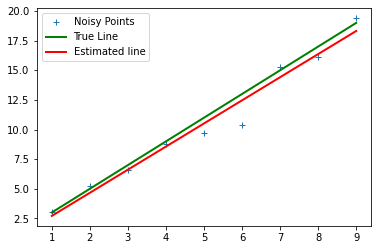

In [17]:
m = 2
c = 1
x  = np.arange(1,10,1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)

y = m*x+c+noise+o

n= len(x)

X = np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y

mstar = B[0]
cstar = B[1]

plt.plot(x,y,'+',label = 'Noisy Points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g', linewidth = 2 , label =r'True Line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth = 2, label = r'Estimated line')
plt.legend()

Q5

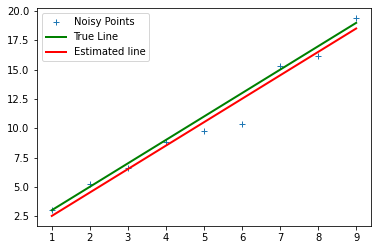

In [18]:
m = 2
c = 1
x  = np.arange(1,10,1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)

y = m*x+c+noise+o

n= len(x)

u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)

ev_corresponding_to_smallest_ev = V[:,np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x)+b*np.mean(y)

mstar = -a/b
cstar = d/b


plt.plot(x,y,'+',label = 'Noisy Points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g', linewidth = 2 , label =r'True Line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth = 2, label = r'Estimated line')
plt.legend()